<a href="https://colab.research.google.com/github/hemanthkori/group-project-1-/blob/master/Research_Project_code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [14]:
# !pip install numpy
# !pip install pandas
# !pip install statsmodels

In [15]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Basic table

In [16]:
basic_df = pd.read_csv('/content/Basic_table.csv', encoding='ascii')

In [17]:
print(basic_df.head())

  Automaker  Automaker_ID    Genmodel Genmodel_ID
0        AC             1       Cobra         1_1
1    Abarth             2  124 Spider         2_1
2    Abarth             2         500         2_2
3    Abarth             2        500C         2_3
4    Abarth             2         595         2_4


In [18]:
print(basic_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1011 entries, 0 to 1010
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Automaker     1011 non-null   object
 1   Automaker_ID  1011 non-null   int64 
 2   Genmodel      1011 non-null   object
 3   Genmodel_ID   1011 non-null   object
dtypes: int64(1), object(3)
memory usage: 31.7+ KB
None


In [19]:
print(basic_df.isnull().sum())

Automaker       0
Automaker_ID    0
Genmodel        0
Genmodel_ID     0
dtype: int64


<Figure size 640x480 with 0 Axes>

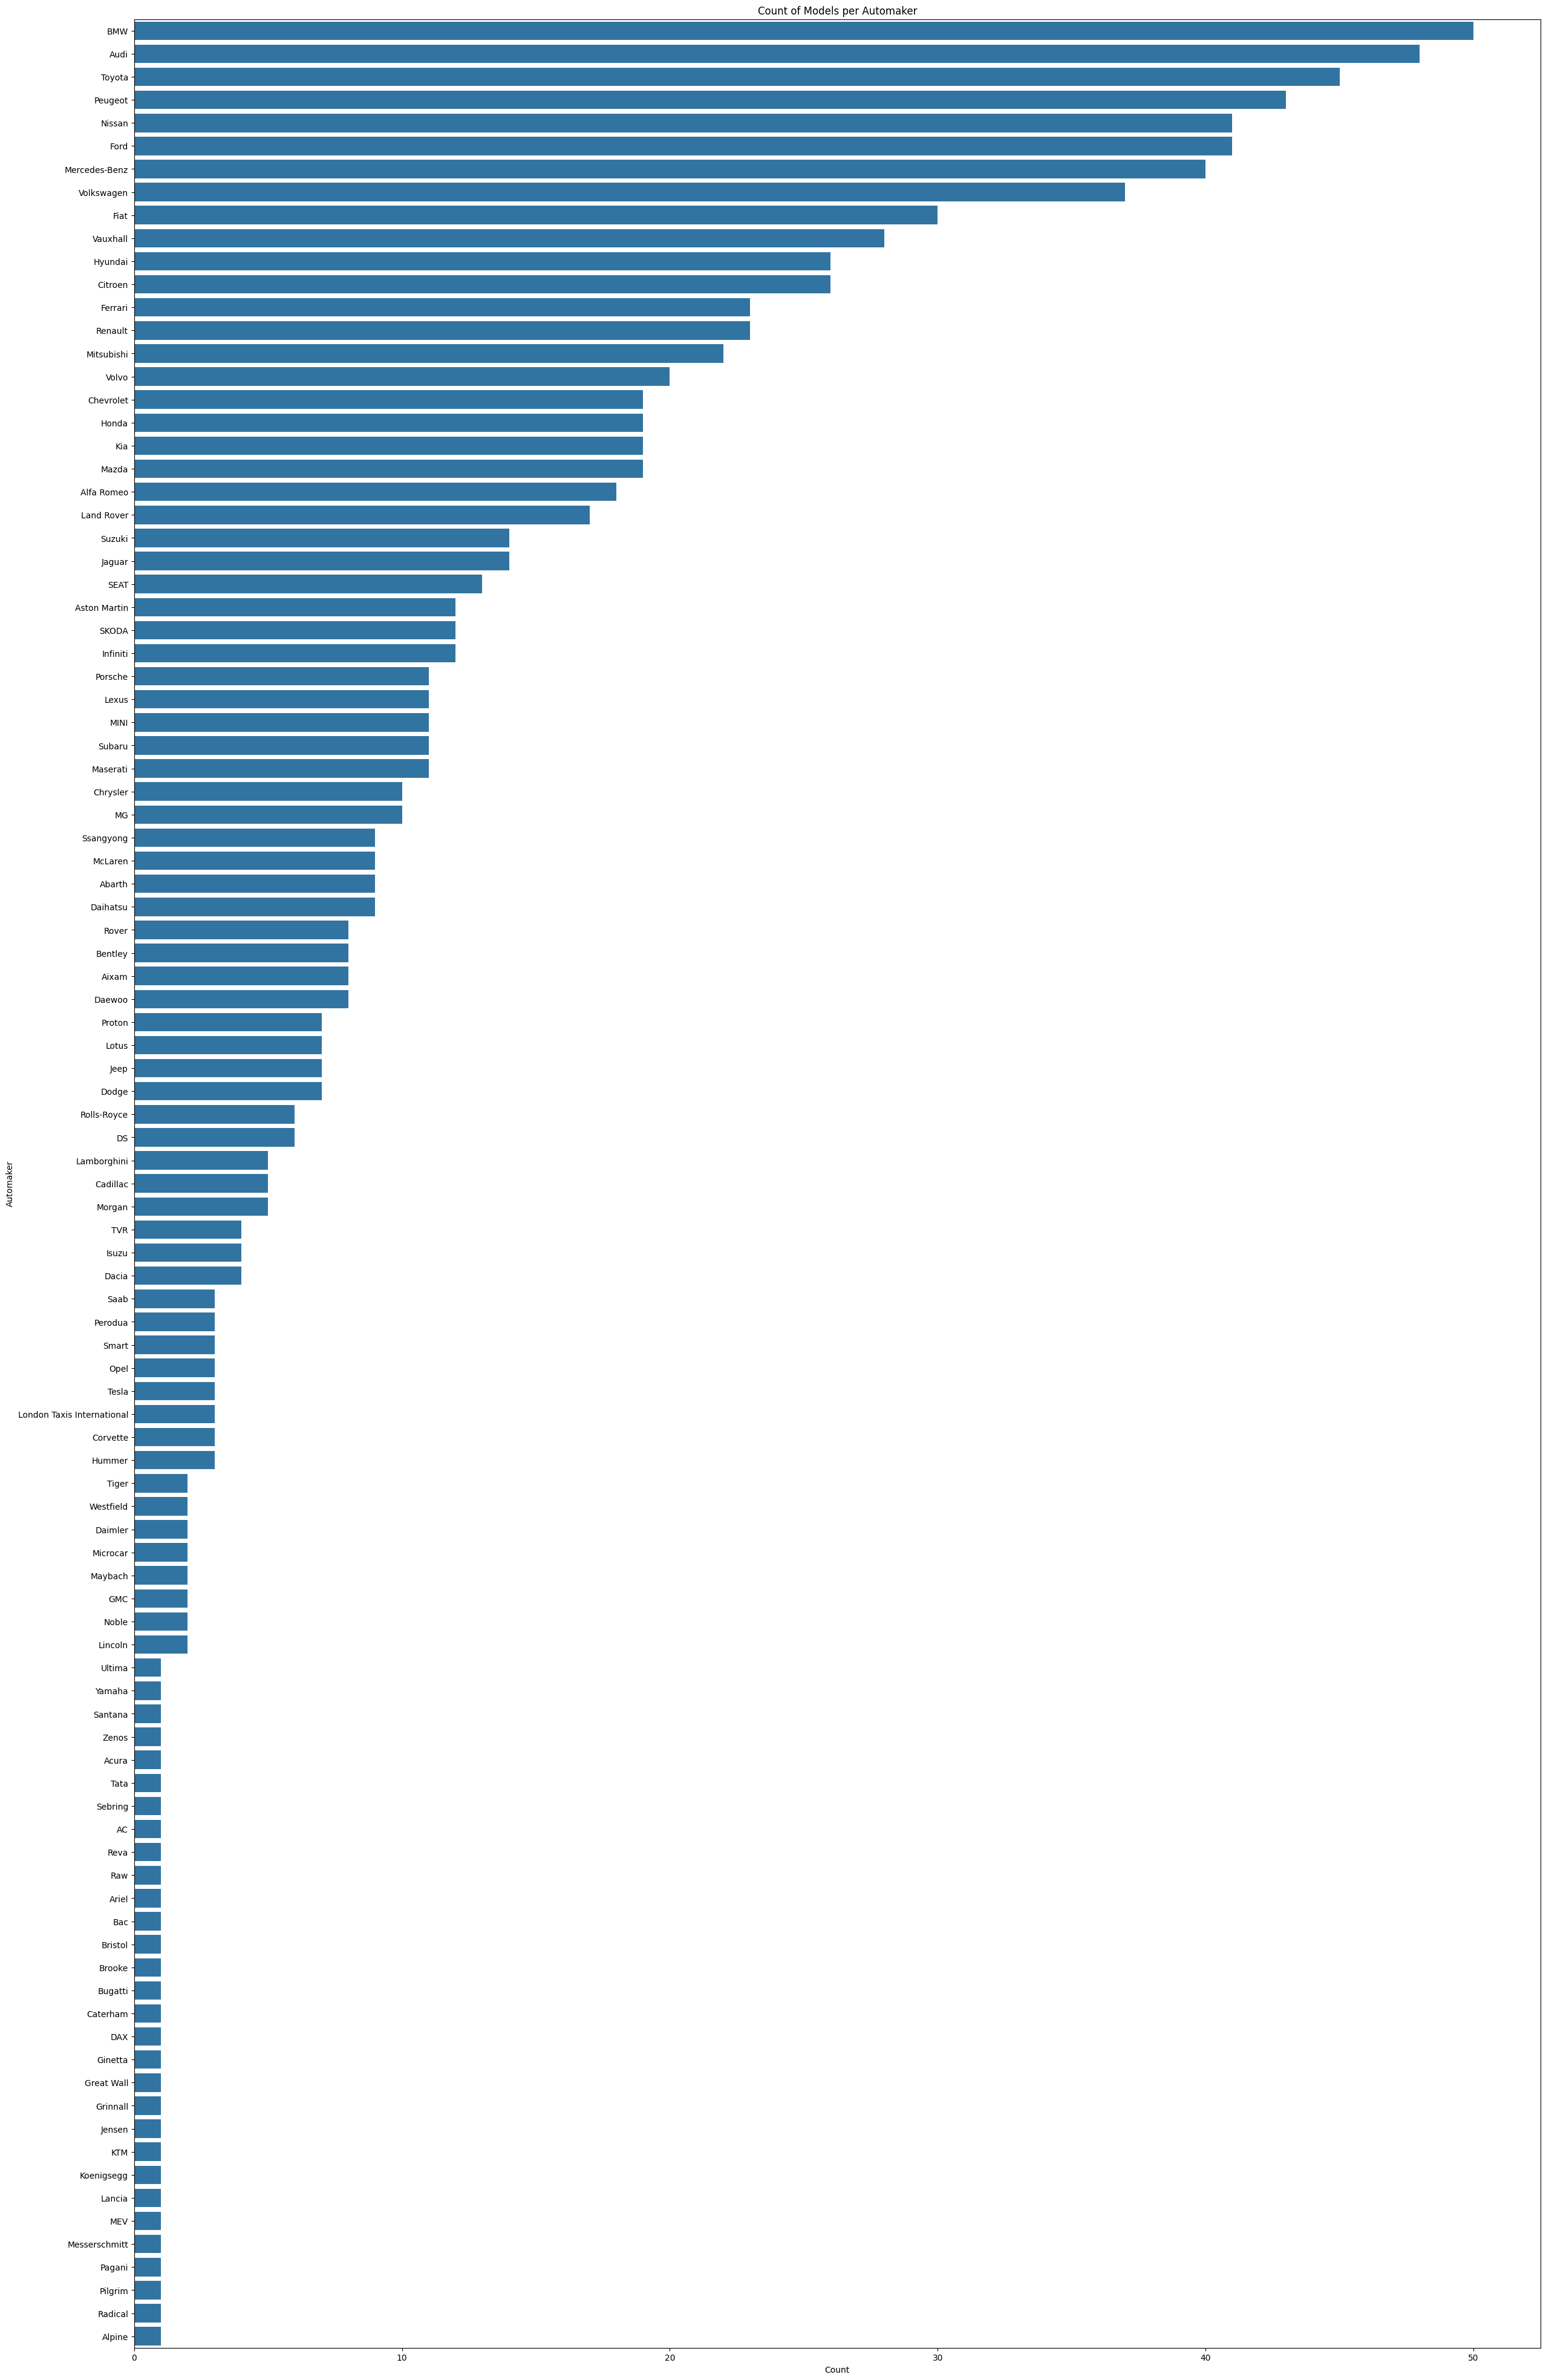

In [20]:
plt.figure(facecolor='white')

plt.figure(figsize=(30, 50))
sns.countplot(y='Automaker', data=basic_df, order=basic_df['Automaker'].value_counts().index)
plt.title('Count of Models per Automaker')
plt.xlabel('Count')
plt.ylabel('Automaker')
plt.show()

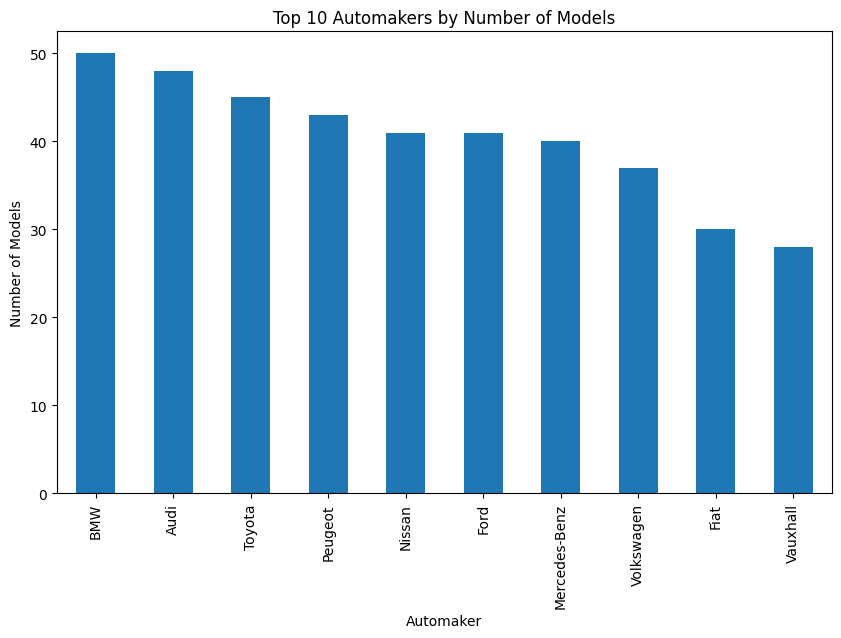

In [21]:
top_10_automakers = basic_df['Automaker'].value_counts().head(10)
plt.figure(figsize=(10, 6))
top_10_automakers.plot(kind='bar')
plt.title('Top 10 Automakers by Number of Models')
plt.xlabel('Automaker')
plt.ylabel('Number of Models')
plt.show()

# Sales table

In [22]:
sales_df = pd.read_csv('/content/Sales_table.csv', encoding='ascii')

In [23]:
print(sales_df.head())

    Maker      Genmodel Genmodel_ID  2020  2019  2018  2017  2016  2015  2014  \
0  ABARTH    ABARTH 124         2_1     0    19    27    60     0     0     0   
1  ABARTH    ABARTH 500         2_2     0     0     1     2    66   717   762   
2  ABARTH    ABARTH 595         2_4  2144  2866  3907  3295  3132  1612   516   
3  ABARTH    ABARTH 695         2_6    45    65   270   114    29    10    14   
4  ABARTH  ABARTH PUNTO         2_9     0     0     0     0     0     0    56   

   ...  2010  2009  2008  2007  2006  2005  2004  2003  2002  2001  
0  ...     0     0     0     0     0     0     0     0     0     0  
1  ...   915   766     0     0     0     0     0     0     0     0  
2  ...     0     0     0     0     0     0     0     0     0     0  
3  ...     0     0     0     0     0     0     0     0     0     0  
4  ...    97   172    74     0     0     0     0     0     0     0  

[5 rows x 23 columns]


In [24]:
print(sales_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 773 entries, 0 to 772
Data columns (total 23 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Maker        773 non-null    object
 1   Genmodel     773 non-null    object
 2   Genmodel_ID  773 non-null    object
 3   2020         773 non-null    int64 
 4   2019         773 non-null    int64 
 5   2018         773 non-null    int64 
 6   2017         773 non-null    int64 
 7   2016         773 non-null    int64 
 8   2015         773 non-null    int64 
 9   2014         773 non-null    int64 
 10  2013         773 non-null    int64 
 11  2012         773 non-null    int64 
 12  2011         773 non-null    int64 
 13  2010         773 non-null    int64 
 14  2009         773 non-null    int64 
 15  2008         773 non-null    int64 
 16  2007         773 non-null    int64 
 17  2006         773 non-null    int64 
 18  2005         773 non-null    int64 
 19  2004         773 non-null    

In [25]:
print(sales_df.isnull().sum())

Maker          0
Genmodel       0
Genmodel_ID    0
2020           0
2019           0
2018           0
2017           0
2016           0
2015           0
2014           0
2013           0
2012           0
2011           0
2010           0
2009           0
2008           0
2007           0
2006           0
2005           0
2004           0
2003           0
2002           0
2001           0
dtype: int64


In [26]:
sales_summary = sales_df.drop(columns=['Maker', 'Genmodel', 'Genmodel_ID']).sum()
print(sales_summary)

2020    1530118
2019    2178658
2018    2212385
2017    2290444
2016    2476613
2015    2421219
2014    2253307
2013    2032197
2012    1789436
2011    1648030
2010    1674012
2009    1578106
2008    1500885
2007    1527848
2006    1256941
2005    1024944
2004     818247
2003     622347
2002     436447
2001     269887
dtype: int64


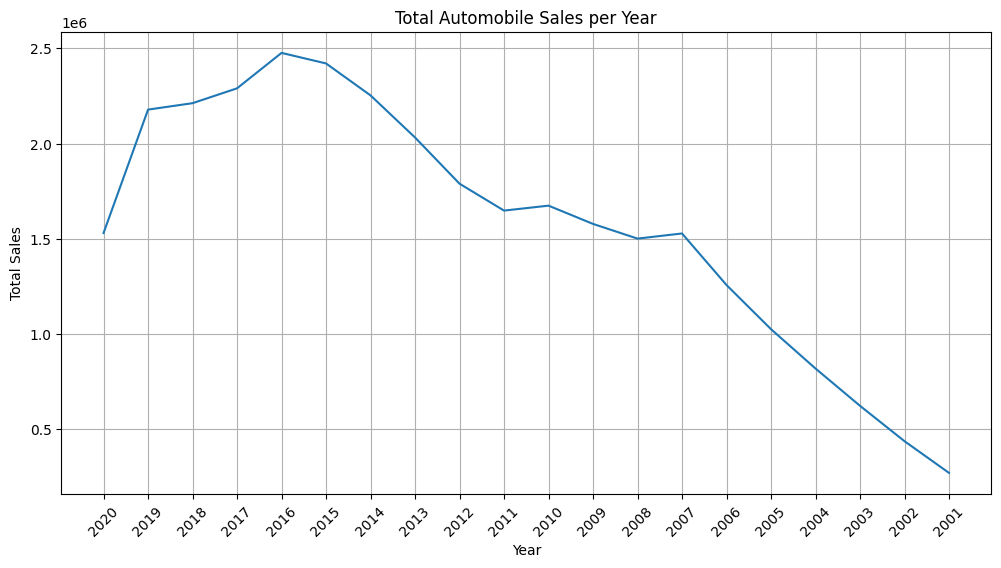

In [27]:
plt.figure(figsize=(12, 6), facecolor='white')
sns.lineplot(data=sales_summary)
plt.title('Total Automobile Sales per Year')
plt.xlabel('Year')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

<Figure size 640x480 with 0 Axes>

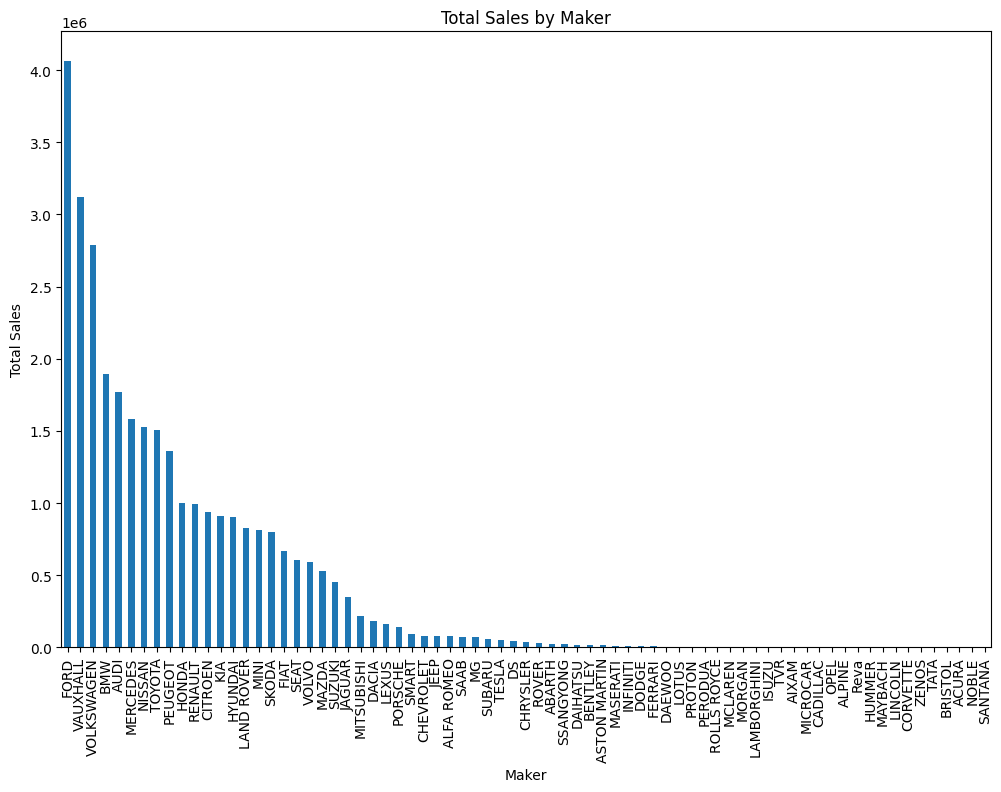

In [28]:
plt.figure(facecolor='white')
sales_df['Total_Sales'] = sales_df.iloc[:, 3:].sum(axis=1)
total_sales_by_maker = sales_df.groupby('Maker')['Total_Sales'].sum().sort_values(ascending=False)
plt.figure(figsize=(12, 8))
total_sales_by_maker.plot(kind='bar')
plt.title('Total Sales by Maker')
plt.xlabel('Maker')
plt.ylabel('Total Sales')
plt.show()

<Figure size 1200x800 with 0 Axes>

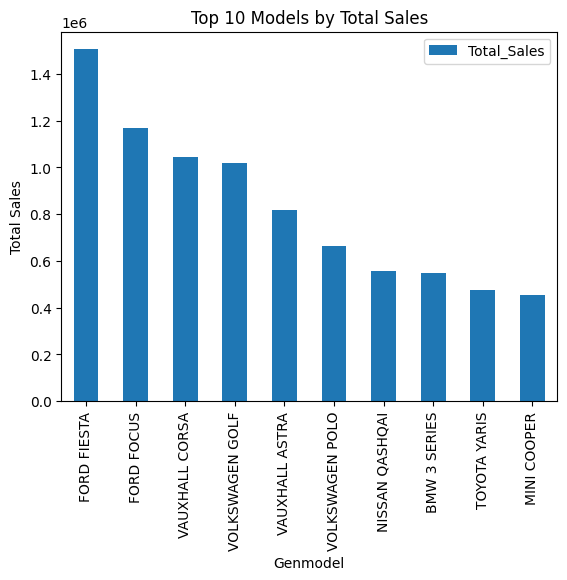

In [29]:
top_10_models = sales_df[['Genmodel', 'Total_Sales']].sort_values(by='Total_Sales', ascending=False).head(10)
plt.figure(figsize=(12, 8))
top_10_models.set_index('Genmodel').plot(kind='bar')
plt.title('Top 10 Models by Total Sales')
plt.xlabel('Genmodel')
plt.ylabel('Total Sales')
plt.show()

<Figure size 3000x1000 with 0 Axes>

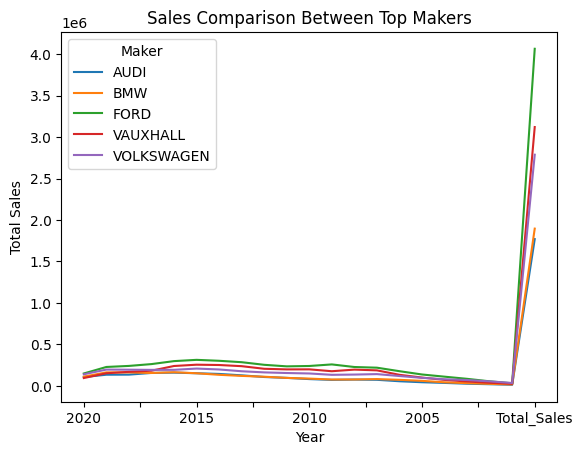

In [30]:
total_sales_by_maker = sales_df.groupby('Maker')['Total_Sales'].sum().sort_values(ascending=False)
top_makers = total_sales_by_maker.head(5).index

filtered_sales_data = sales_df[sales_df['Maker'].isin(top_makers)]

sales_comparison = filtered_sales_data.groupby('Maker').sum().T.iloc[2:]

plt.figure(figsize=(30, 10))
sales_comparison.plot()
plt.title('Sales Comparison Between Top Makers')
plt.xlabel('Year')
plt.ylabel('Total Sales')
plt.show()

# Pricing table

In [33]:
price_df = pd.read_csv('/content/Price_table.csv', encoding='ascii')

In [34]:
print(price_df.head())

    Maker    Genmodel Genmodel_ID  Year  Entry_price
0  Abarth  124 Spider         2_1  2016        29365
1  Abarth  124 Spider         2_1  2017        26665
2  Abarth  124 Spider         2_1  2018        26665
3  Abarth  124 Spider         2_1  2019        29515
4  Abarth         500         2_2  2009        13400


In [35]:
print(price_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6333 entries, 0 to 6332
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Maker        6333 non-null   object
 1   Genmodel     6333 non-null   object
 2   Genmodel_ID  6333 non-null   object
 3   Year         6333 non-null   int64 
 4   Entry_price  6333 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 247.5+ KB
None


In [36]:
print(price_df.isnull().sum())

Maker          0
Genmodel       0
Genmodel_ID    0
Year           0
Entry_price    0
dtype: int64


In [37]:
price_summary = price_df.groupby('Year')['Entry_price'].mean()
print(price_summary.head())

Year
1998    21200.059880
1999    20934.978723
2000    20055.744186
2001    20065.264463
2002    22670.072581
Name: Entry_price, dtype: float64


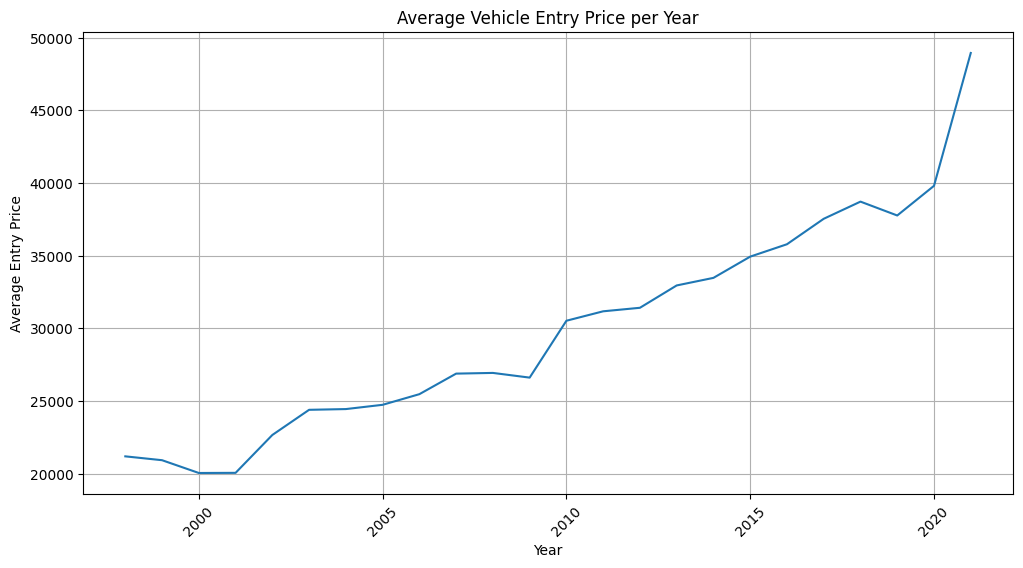

In [38]:
plt.figure(figsize=(12, 6), facecolor='white')
sns.lineplot(data=price_summary)
plt.title('Average Vehicle Entry Price per Year')
plt.xlabel('Year')
plt.ylabel('Average Entry Price')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

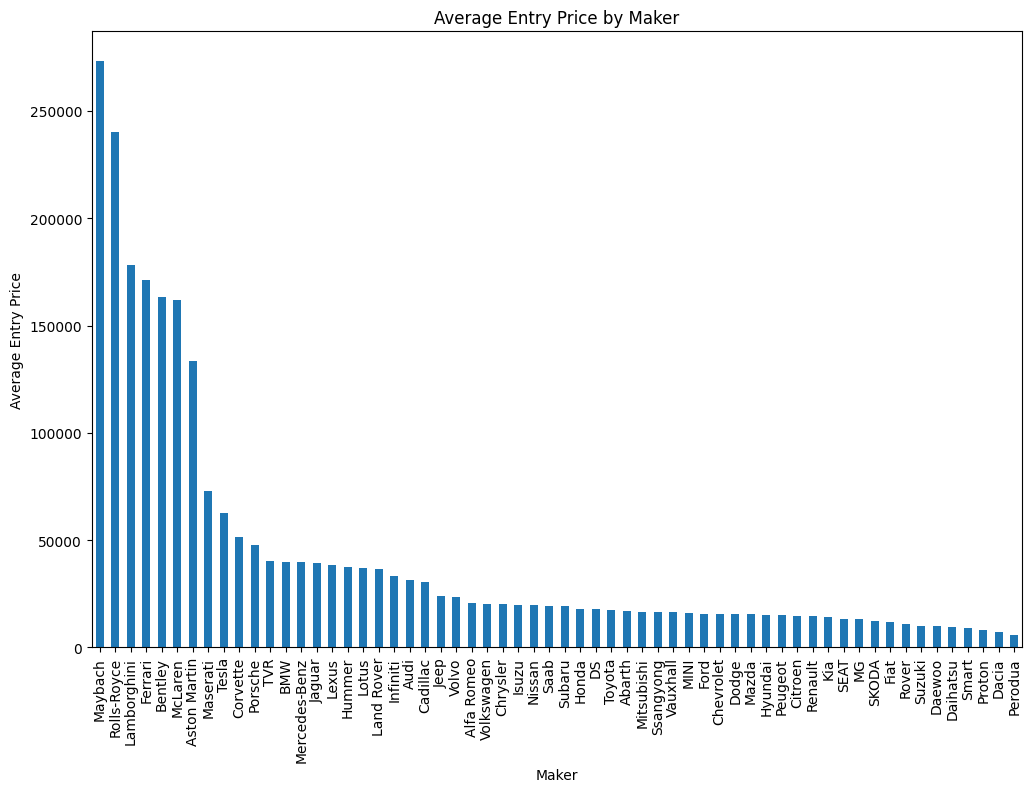

In [39]:
avg_price_by_maker = price_df.groupby('Maker')['Entry_price'].mean().sort_values(ascending=False)
plt.figure(figsize=(12, 8))
avg_price_by_maker.plot(kind='bar')
plt.title('Average Entry Price by Maker')
plt.xlabel('Maker')
plt.ylabel('Average Entry Price')
plt.show()

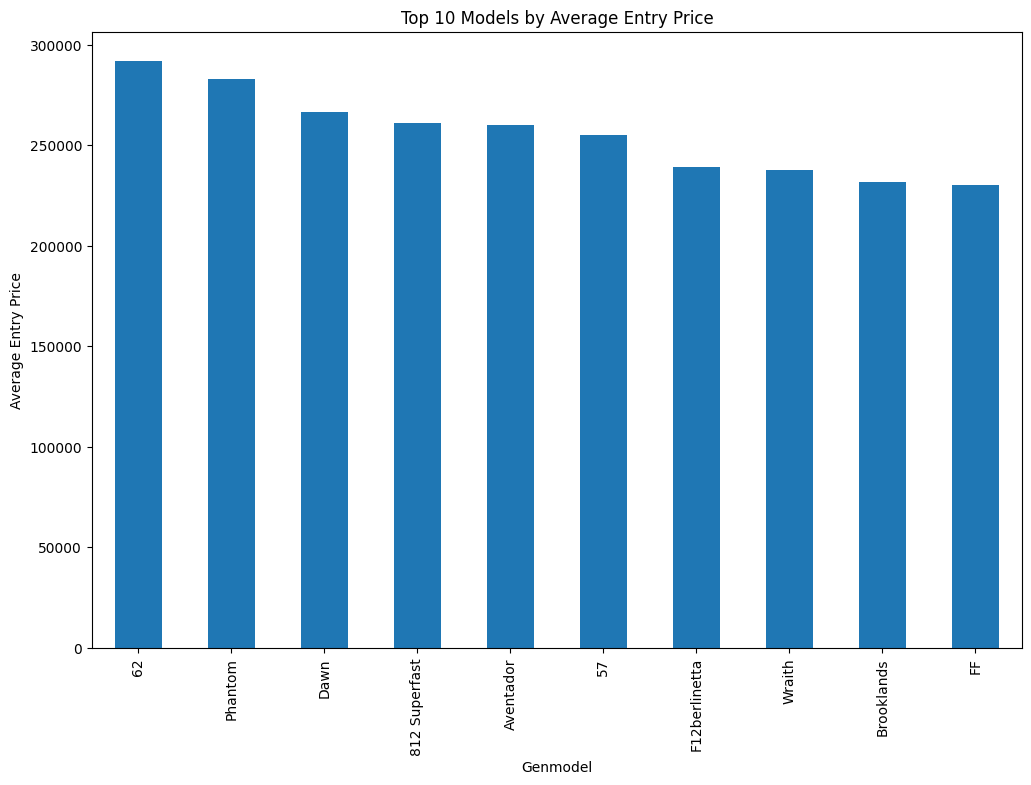

In [40]:
top_10_models = price_df.groupby('Genmodel')['Entry_price'].mean().sort_values(ascending=False).head(10)
plt.figure(figsize=(12, 8))
top_10_models.plot(kind='bar')
plt.title('Top 10 Models by Average Entry Price')
plt.xlabel('Genmodel')
plt.ylabel('Average Entry Price')
plt.show()

<Figure size 1200x800 with 0 Axes>

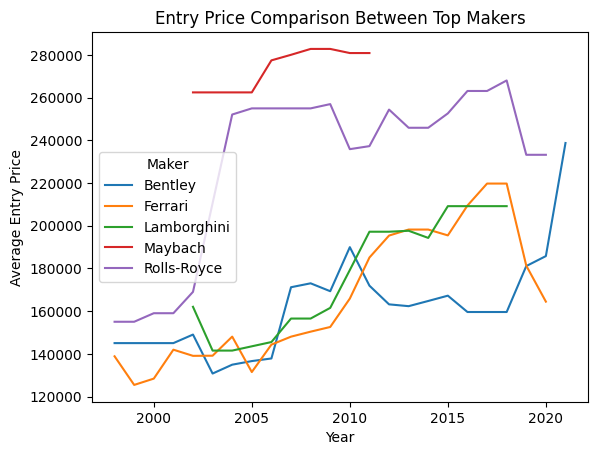

In [41]:
top_makers = avg_price_by_maker.head(5).index
price_comparison = price_df[price_df['Maker'].isin(top_makers)].groupby(['Year', 'Maker'])['Entry_price'].mean().unstack()
plt.figure(figsize=(12, 8))
price_comparison.plot()
plt.title('Entry Price Comparison Between Top Makers')
plt.xlabel('Year')
plt.ylabel('Average Entry Price')
plt.show()

# Trim table

In [43]:
trim_df = pd.read_csv('/content/Trim_table.csv', encoding='ascii')

In [44]:
print(trim_df.head())

  Genmodel_ID   Maker    Genmodel  \
0         2_1  Abarth  124 spider   
1         2_1  Abarth  124 spider   
2         2_1  Abarth  124 spider   
3         2_1  Abarth  124 spider   
4         2_1  Abarth  124 spider   

                                                Trim  Year  Price  \
0              124 Spider1.4 Turbo MultiAir 170hp 2d  2016  29365   
1  124 Spider1.4 Turbo MultiAir 170hp Sequenziale...  2016  31365   
2              124 Spider1.4 Turbo MultiAir 170hp 2d  2017  29365   
3  124 Spider1.4 Turbo MultiAir 170hp Sequenziale...  2017  31365   
4    124 SpiderScorpione 1.4 Turbo MultiAir 170hp 2d  2017  26665   

   Gas_emission Fuel_type  Engine_size  
0           148    Petrol         1368  
1           153    Petrol         1368  
2           148    Petrol         1368  
3           153    Petrol         1368  
4           148    Petrol         1368  


In [45]:
print(trim_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 335562 entries, 0 to 335561
Data columns (total 9 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   Genmodel_ID   335562 non-null  object
 1   Maker         335562 non-null  object
 2   Genmodel      335562 non-null  object
 3   Trim          335562 non-null  object
 4   Year          335562 non-null  int64 
 5   Price         335562 non-null  int64 
 6   Gas_emission  335562 non-null  int64 
 7   Fuel_type     335562 non-null  object
 8   Engine_size   335562 non-null  int64 
dtypes: int64(4), object(5)
memory usage: 23.0+ MB
None


In [46]:
print(trim_df.isnull().sum())

Genmodel_ID     0
Maker           0
Genmodel        0
Trim            0
Year            0
Price           0
Gas_emission    0
Fuel_type       0
Engine_size     0
dtype: int64


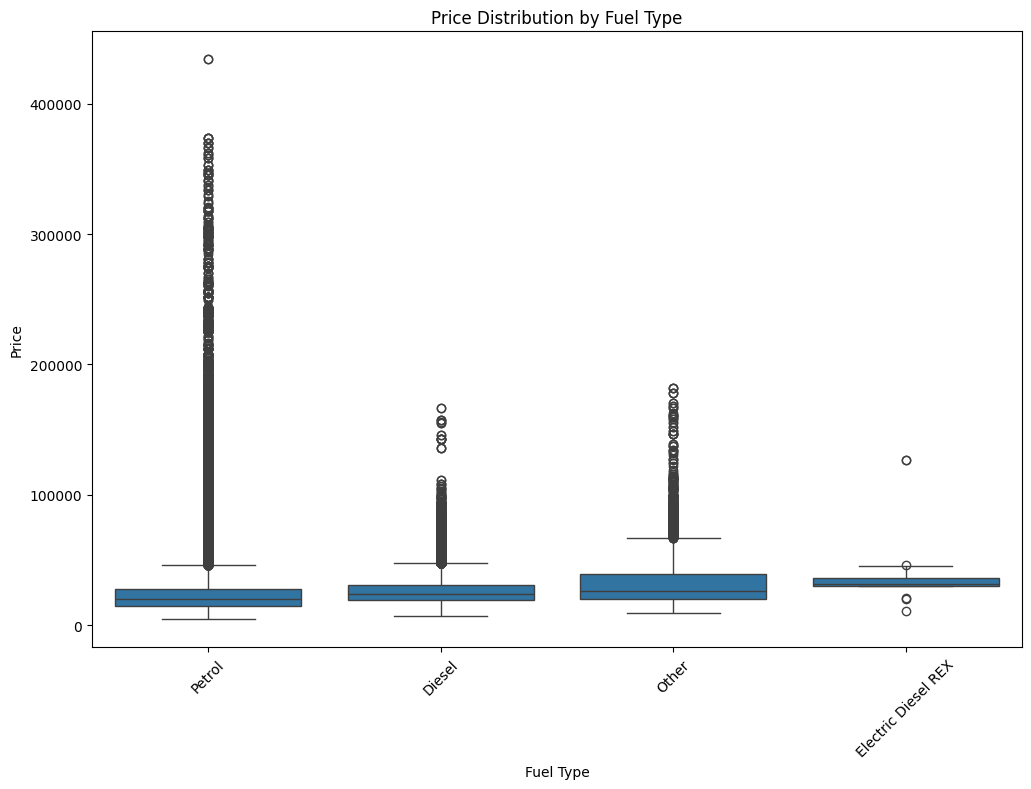

In [47]:
plt.figure(figsize=(12, 8))
sns.boxplot(x='Fuel_type', y='Price', data=trim_df)
plt.title('Price Distribution by Fuel Type')
plt.xlabel('Fuel Type')
plt.ylabel('Price')
plt.xticks(rotation=45)
plt.show()

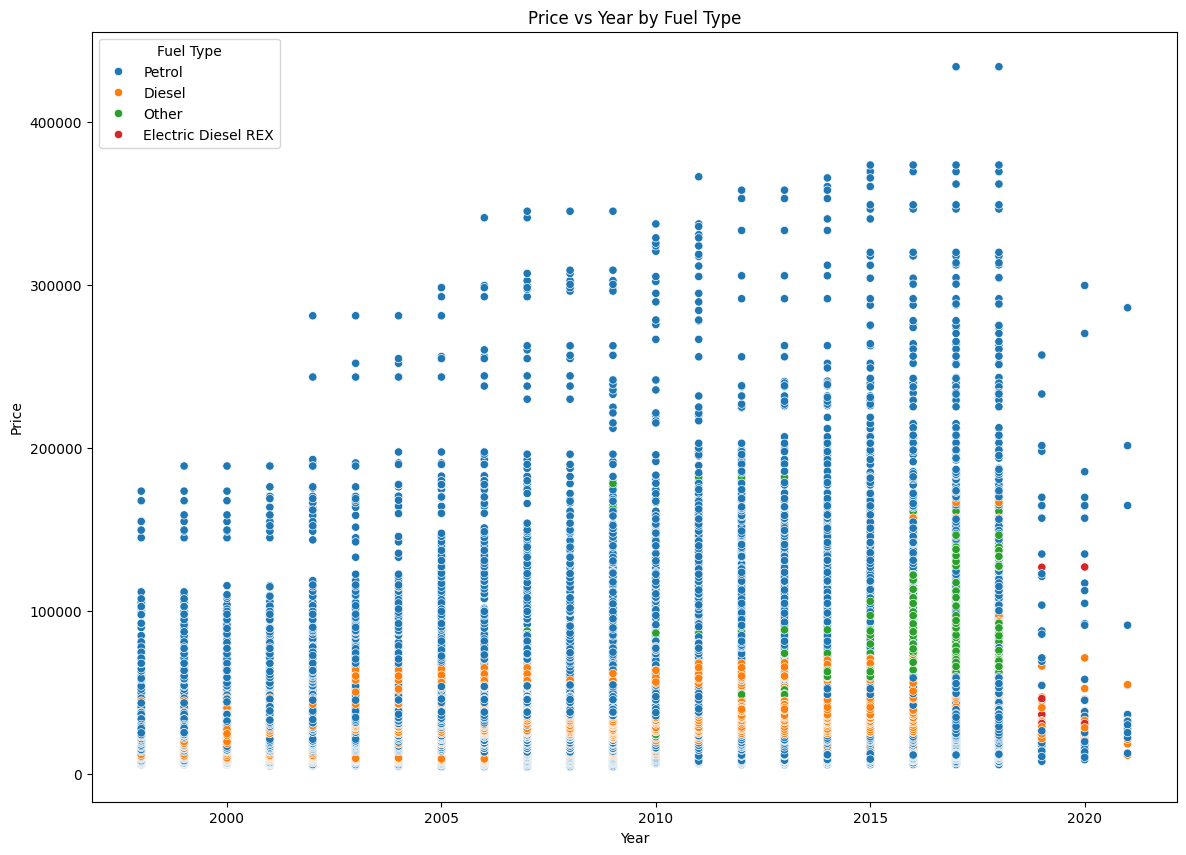

In [48]:
plt.figure(figsize=(14, 10))
sns.scatterplot(x='Year', y='Price', hue='Fuel_type', data=trim_df)
plt.title('Price vs Year by Fuel Type')
plt.xlabel('Year')
plt.ylabel('Price')
plt.legend(title='Fuel Type')
plt.show()

# Ad table

In [50]:
ad_df = pd.read_csv('/content/Ad_table.csv', encoding='ascii')

<ipython-input-50-921b2b61c9ca>:1: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  ad_df = pd.read_csv('/content/Ad_table.csv', encoding='ascii')


In [51]:
print(ad_df.head())

     Maker Genmodel Genmodel_ID   Adv_ID  Adv_year  Adv_month   Color  \
0  Bentley   Arnage        10_1  10_1$$1      2018          4  Silver   
1  Bentley   Arnage        10_1  10_1$$2      2018          6    Grey   
2  Bentley   Arnage        10_1  10_1$$3      2017         11    Blue   
3  Bentley   Arnage        10_1  10_1$$4      2018          4   Green   
4  Bentley   Arnage        10_1  10_1$$5      2017         11    Grey   

   Reg_year Bodytype Runned_Miles Engin_size    Gearbox Fuel_type  Price  \
0    2000.0   Saloon        60000       6.8L  Automatic    Petrol  21500   
1    2002.0   Saloon        44000       6.8L  Automatic    Petrol  28750   
2    2002.0   Saloon        55000       6.8L  Automatic    Petrol  29999   
3    2003.0   Saloon        14000       6.8L  Automatic    Petrol  34948   
4    2003.0   Saloon        61652       6.8L  Automatic    Petrol  26555   

   Seat_num  Door_num  
0       5.0       4.0  
1       5.0       4.0  
2       5.0       4.0  
3       

In [52]:
print(ad_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 268255 entries, 0 to 268254
Data columns (total 16 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Maker         268255 non-null  object 
 1   Genmodel      268255 non-null  object 
 2   Genmodel_ID   268255 non-null  object 
 3   Adv_ID        268255 non-null  object 
 4   Adv_year      268255 non-null  int64  
 5   Adv_month     268255 non-null  int64  
 6   Color         246380 non-null  object 
 7   Reg_year      268248 non-null  float64
 8   Bodytype      267301 non-null  object 
 9   Runned_Miles  267200 non-null  object 
 10  Engin_size    266191 non-null  object 
 11  Gearbox       268088 non-null  object 
 12  Fuel_type     267846 non-null  object 
 13  Price         268255 non-null  object 
 14  Seat_num      261781 non-null  float64
 15  Door_num      263702 non-null  float64
dtypes: float64(3), int64(2), object(11)
memory usage: 32.7+ MB
None


In [53]:
print(ad_df.isnull().sum())

Maker               0
Genmodel            0
Genmodel_ID         0
Adv_ID              0
Adv_year            0
Adv_month           0
Color           21875
Reg_year            7
Bodytype          954
Runned_Miles     1055
Engin_size       2064
Gearbox           167
Fuel_type         409
Price               0
Seat_num         6474
Door_num         4553
dtype: int64


In [54]:
ad_df['Price'] = pd.to_numeric(ad_df['Price'], errors='coerce')
ad_df_cleaned = ad_df.dropna(subset=['Price'])
print(ad_df_cleaned['Price'].apply(lambda x: type(x)).value_counts())
print(ad_df_cleaned['Price'].unique())

Price
<class 'float'>    267110
Name: count, dtype: int64
[21500. 28750. 29999. ...  5355.  3625.  3684.]


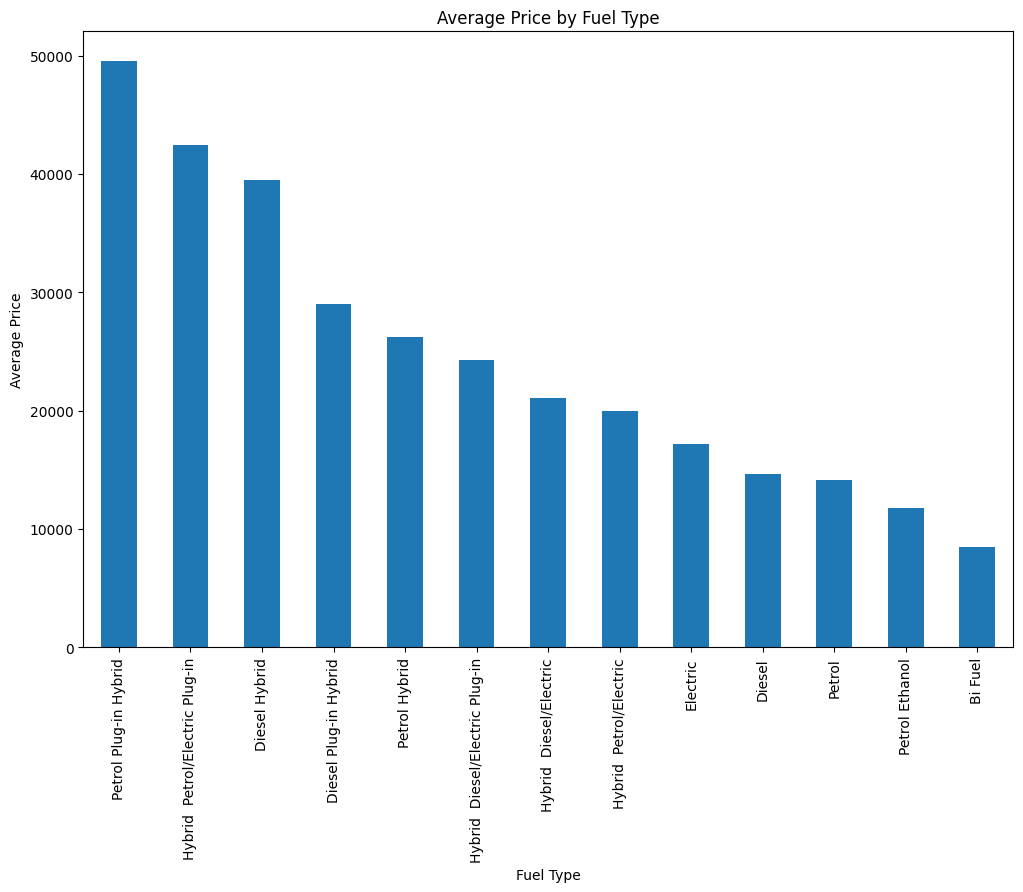

In [55]:
avg_price_by_fuel_type = ad_df_cleaned.groupby('Fuel_type')['Price'].mean().sort_values(ascending=False)
plt.figure(figsize=(12, 8))
avg_price_by_fuel_type.plot(kind='bar')
plt.title('Average Price by Fuel Type')
plt.xlabel('Fuel Type')
plt.ylabel('Average Price')
plt.show()

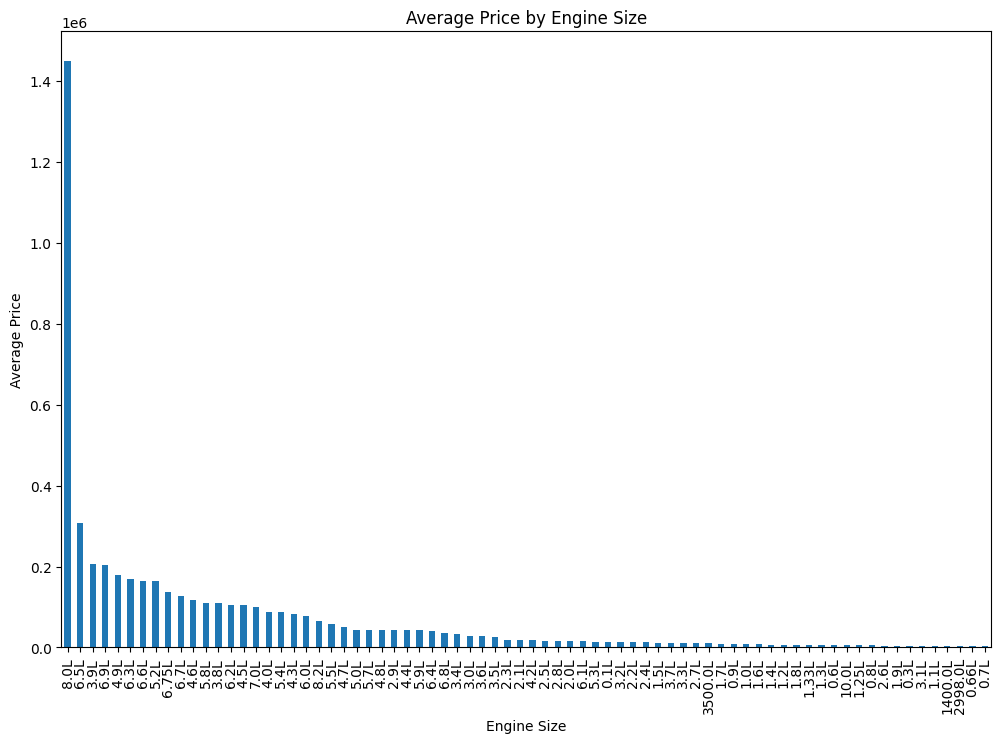

In [56]:
avg_price_by_engine_size = ad_df_cleaned.groupby('Engin_size')['Price'].mean().sort_values(ascending=False)
plt.figure(figsize=(12, 8))
avg_price_by_engine_size.plot(kind='bar')
plt.title('Average Price by Engine Size')
plt.xlabel('Engine Size')
plt.ylabel('Average Price')
plt.show()

List of colors:  ['Silver' 'Grey' 'Blue' 'Green' 'Black' nan 'White' 'Red' 'Brown' 'Orange'
 'Maroon' 'Purple' 'Yellow' 'Multicolour' 'Gold' 'Pink' 'Bronze' 'Beige'
 'Burgundy' 'Magenta' 'Turquoise' 'Indigo' 'Navy']
Most common color:  Black  with  48751  values
Least common color:  Indigo  with  4  values


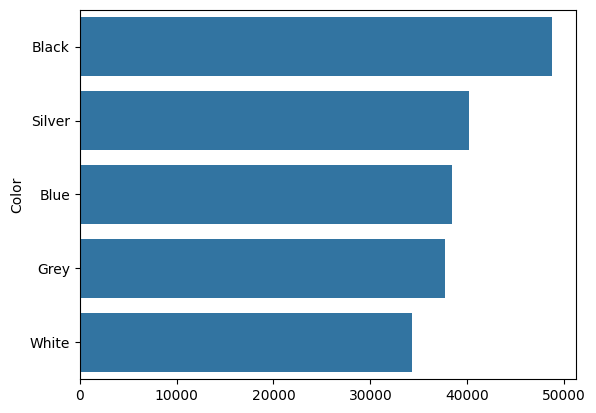

In [57]:
print('List of colors: ', ad_df['Color'].unique())
top_colors = ad_df['Color'].value_counts().nlargest(5)
bottom_colors = ad_df['Color'].value_counts().nsmallest(1)
sns.barplot(y=top_colors.index, x=top_colors.values)
print("Most common color: ", top_colors.index[0], ' with ', top_colors.values[0], ' values')
print("Least common color: ", bottom_colors.index[0], ' with ', bottom_colors.values[0], ' values')

List of bodytypes:  ['Saloon' 'Convertible' 'SUV' 'Estate' 'Coupe' nan 'Hatchback' 'MPV'
 'Combi Van' 'Panel Van' 'Minibus' 'Window Van' 'Pickup' 'Manual'
 'Car Derived Van' 'Tipper' 'Camper' 'Chassis Cab' 'Limousine']
Most common Bodytype:  Hatchback  with  103768  values
Least common Bodytype:  Tipper  with  1  values


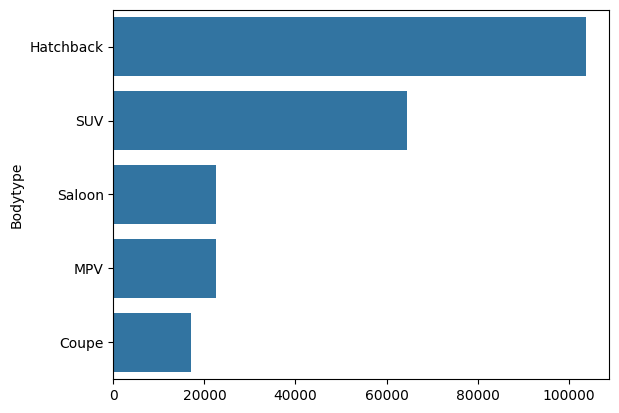

In [58]:
print('List of bodytypes: ', ad_df['Bodytype'].unique())
top_bodytype = ad_df['Bodytype'].value_counts().nlargest(5)
bottom_bodytype = ad_df['Bodytype'].value_counts().nsmallest(1)
sns.barplot(y=top_bodytype.index, x=top_bodytype.values)
print("Most common Bodytype: ", top_bodytype.index[0], ' with ', top_bodytype.values[0], ' values')
print("Least common Bodytype: ", bottom_bodytype.index[0], ' with ', bottom_bodytype.values[0], ' values')

<Axes: xlabel='Gearbox', ylabel='Count'>

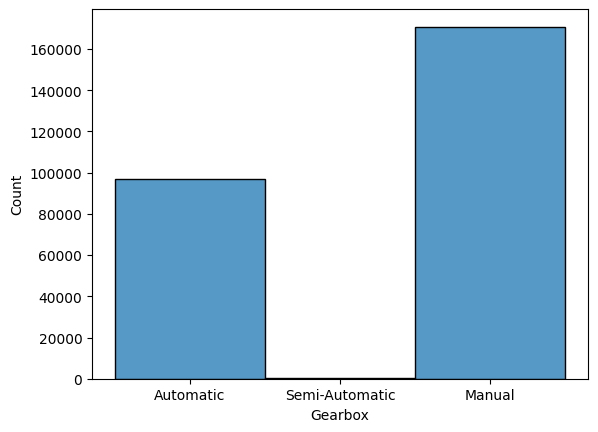

In [59]:
sns.histplot(ad_df['Gearbox'])

<Axes: xlabel='Count', ylabel='Fuel_type'>

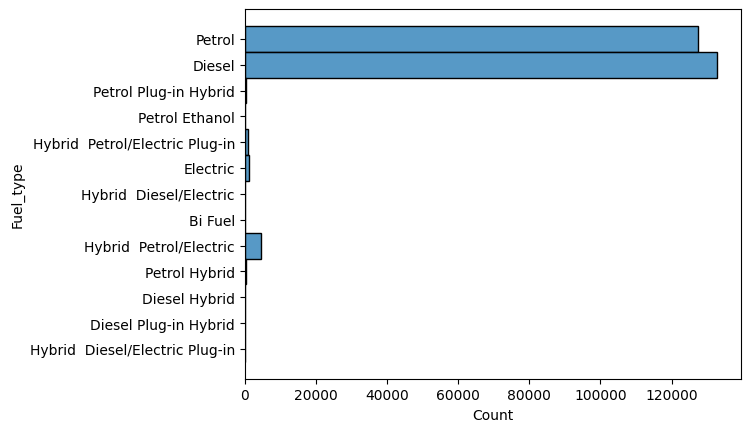

In [60]:
sns.histplot(y=ad_df['Fuel_type'])

In [62]:
annual_sales = pd.read_csv('/content/Sales_table.csv')

annual_sales_melted = annual_sales.melt(id_vars=['Maker', 'Genmodel', 'Genmodel_ID'], var_name='Year', value_name='Sales')

annual_sales_melted['Year'] = annual_sales_melted['Year'].astype(int)

annual_sales_grouped = annual_sales_melted.groupby('Year')['Sales'].sum().reset_index()
annual_sales_grouped.set_index('Year', inplace=True)

print(annual_sales_grouped.head())

price_data = price_df[pd.to_numeric(price_df['Year'], errors='coerce').notnull()]

price_data['Year'] = price_data['Year'].astype(int)

price_grouped = price_data.groupby('Year')['Entry_price'].mean().reset_index()
price_grouped.set_index('Year', inplace=True)

price_grouped['Price Change (%)'] = price_grouped['Entry_price'].pct_change() * 100

annual_sales_grouped['Sales Change (%)'] = annual_sales_grouped['Sales'].pct_change() * 100

combined_data = pd.concat([annual_sales_grouped, price_grouped], axis=1)

print(combined_data.head())

        Sales
Year         
2001   269887
2002   436447
2003   622347
2004   818247
2005  1024944
          Sales  Sales Change (%)   Entry_price  Price Change (%)
Year                                                             
2001   269887.0               NaN  20065.264463          0.047469
2002   436447.0         61.714718  22670.072581         12.981678
2003   622347.0         42.593946  24401.282443          7.636543
2004   818247.0         31.477616  24452.206522          0.208694
2005  1024944.0         25.260954  24745.523132          1.199551


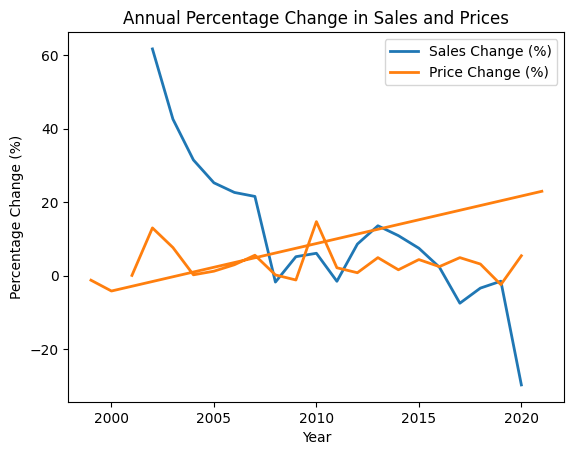

In [63]:
plt.figure(facecolor='white')
plt.plot(combined_data.index, combined_data['Sales Change (%)'], label='Sales Change (%)', linewidth=2)
plt.plot(combined_data.index, combined_data['Price Change (%)'], label='Price Change (%)', linewidth=2)
plt.title('Annual Percentage Change in Sales and Prices')
plt.xlabel('Year')
plt.ylabel('Percentage Change (%)')
plt.legend()
plt.show()

In [64]:
sales_summary.index = sales_summary.index.astype(int)

sales_2019_2020 = sales_summary.loc[[2019, 2020]]
price_2019_2020 = price_summary.loc[[2019, 2020]]

sales_change = ((sales_2019_2020[2020] - sales_2019_2020[2019]) / sales_2019_2020[2019]) * 100
price_change = ((price_2019_2020[2020] - price_2019_2020[2019]) / price_2019_2020[2019]) * 100

print('Percentage change in sales from 2019 to 2020:', sales_change)
print('Percentage change in pricing from 2019 to 2020:', price_change)

Percentage change in sales from 2019 to 2020: -29.767866273641847
Percentage change in pricing from 2019 to 2020: 5.401413753378219


# Augmented Dickey-Fuller test

In [65]:
result = adfuller(annual_sales_grouped['Sales'])

print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\	%s: %.3f' % (key, value))

ADF Statistic: -1.210583
p-value: 0.669027
Critical Values:
\	1%: -3.924
\	5%: -3.068
\	10%: -2.674


In [66]:
annual_sales_diff = annual_sales_grouped.diff().dropna()

result_diff = adfuller(annual_sales_diff['Sales'])

print('ADF Statistic (Differenced): %f' % result_diff[0])
print('p-value (Differenced): %f' % result_diff[1])
print('Critical Values (Differenced):')
for key, value in result_diff[4].items():
    print('\	%s: %.3f' % (key, value))

ADF Statistic (Differenced): -0.308972
p-value (Differenced): 0.924224
Critical Values (Differenced):
\	1%: -3.889
\	5%: -3.054
\	10%: -2.667


In [67]:
annual_sales_diff2 = annual_sales_diff.diff().dropna()

result_diff2 = adfuller(annual_sales_diff2['Sales'])

print('ADF Statistic (Second Order Differenced): %f' % result_diff2[0])
print('p-value (Second Order Differenced): %f' % result_diff2[1])
print('Critical Values (Second Order Differenced):')
for key, value in result_diff2[4].items():
    print('\	%s: %.3f' % (key, value))

ADF Statistic (Second Order Differenced): -3.212424
p-value (Second Order Differenced): 0.019277
Critical Values (Second Order Differenced):
\	1%: -3.924
\	5%: -3.068
\	10%: -2.674


# Forecasting

In [69]:
sales_data = pd.read_csv('/content/Sales_table.csv')

sales_data = sales_data.melt(id_vars=['Maker', 'Genmodel', 'Genmodel_ID'], var_name='Year', value_name='Sales')

sales_data['Year'] = pd.to_numeric(sales_data['Year'])

annual_sales = sales_data.groupby('Year')['Sales'].sum().reset_index()

annual_sales.set_index('Year', inplace=True)

print(annual_sales.head())

        Sales
Year         
2001   269887
2002   436447
2003   622347
2004   818247
2005  1024944


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be give

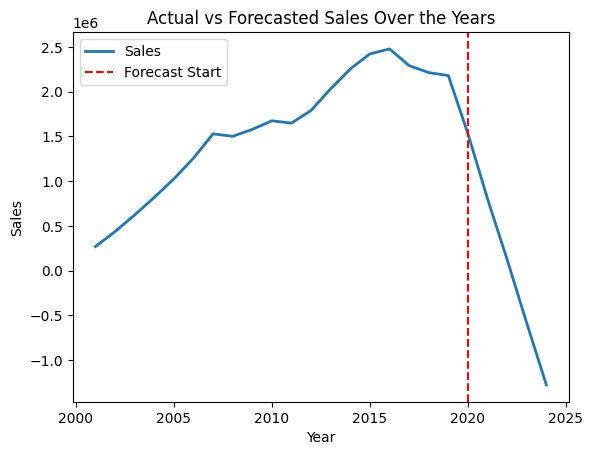

In [70]:
model = ARIMA(annual_sales, order=(1, 2, 1))
model_fit = model.fit()

forecast = model_fit.forecast(steps=4)

forecast_years = pd.DataFrame({'Year': [2021, 2022, 2023, 2024], 'Sales': forecast})
forecast_years.set_index('Year', inplace=True)

combined_sales = pd.concat([annual_sales, forecast_years])

plt.figure(facecolor='white')
plt.plot(combined_sales.index, combined_sales['Sales'], label='Sales', linewidth=2)
plt.axvline(x=2020, color='r', linestyle='--', label='Forecast Start')
plt.title('Actual vs Forecasted Sales Over the Years')
plt.xlabel('Year')
plt.ylabel('Sales')
plt.legend()
plt.show()